In [1]:
#############  loading pakages needed for the project   #############
library(readr)
library(ggplot2) 
library(dplyr)
library(tidyr)
library(tidyverse)
packages = c('treemap', 'tidyverse')
for(p in packages){library
  if(!require(p, character.only = T)){
    install.packages(p)
  }
  library(p, character.only = T)
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v stringr 1.4.0
v purrr   0.3.2     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: treemap
Warning message:
"package 'treemap' was built under R version 3.6.3"

In [11]:
deliveries<-read.csv("deliveries.csv")
matches<-read.csv("matches.csv")

In [12]:
matches

id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,
6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,
7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,
8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,
10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,


In [13]:
deliveries

match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,,,


In [16]:
count(matches)
matches %>% summarize(total_matches = n())

n
756


total_matches
756


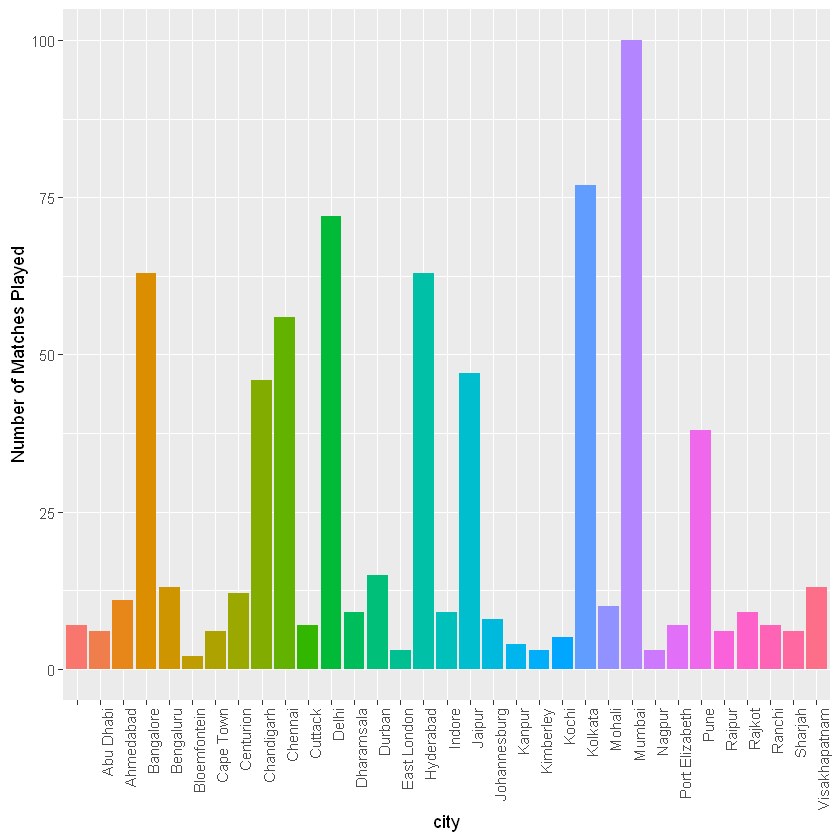

In [5]:
##########   Matches played in different cities  #########
ggplot(matches[which(!is.na(matches$city)),],aes(city,fill= city,rm.na=T)) +geom_bar() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
    ylab("Number of Matches Played") +
    guides(fill=FALSE)

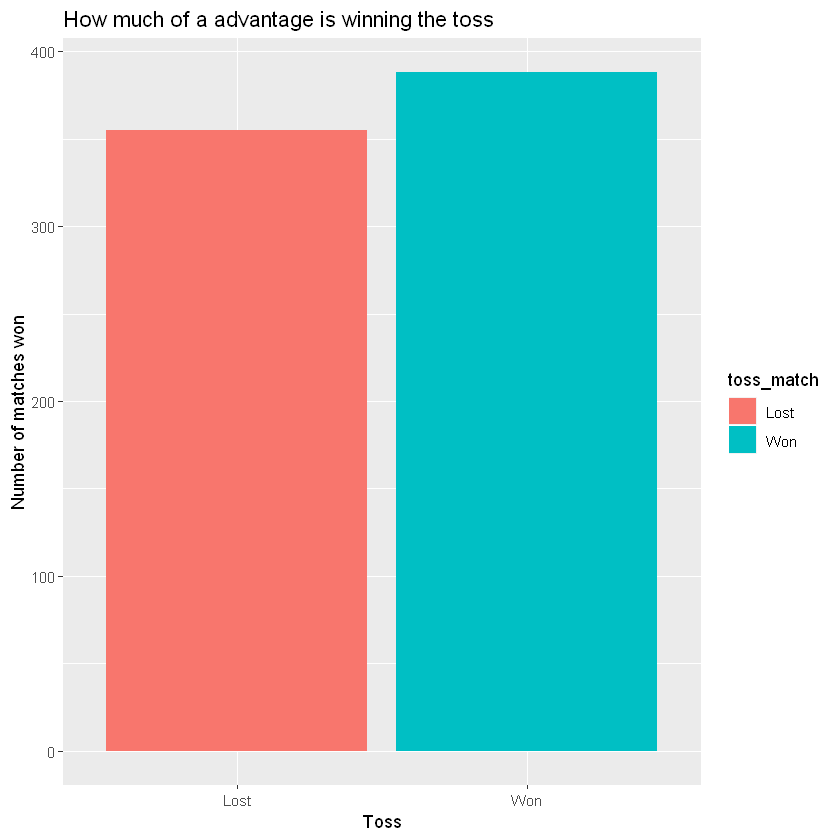

In [6]:

############  IS WINNING TOSS IN IPL HAS ADVANTAGE   ###########################
matches$toss_match<-ifelse(as.character(matches$toss_winner)==as.character(matches$winner),"Won","Lost")
ggplot(matches[which(!is.na(matches$toss_match)),],aes(toss_match, fill = toss_match))+ 
    geom_bar()+ xlab("Toss") +ylab("Number of matches won")+ ggtitle("How much of a advantage is winning the toss")


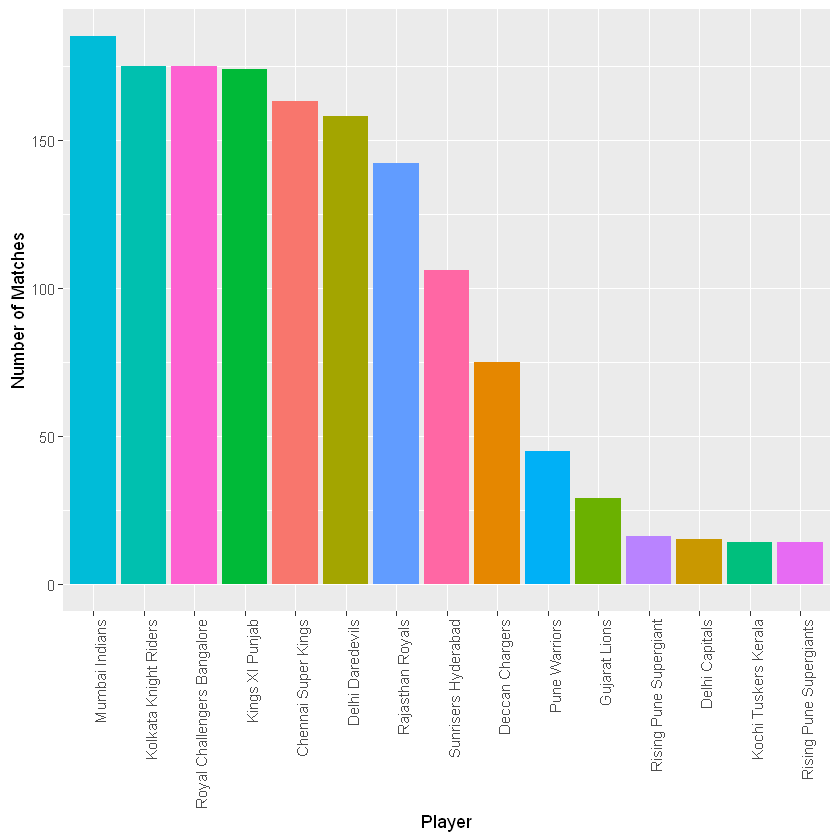

In [7]:
############# NUMBER OF MATCHES PLAYED BY EACH TEAM ################################

ggplot(as.data.frame(table(matches$team2) + table(matches$team1)),aes(reorder(Var1,-Freq),Freq,fill = Var1)) +
geom_bar(stat = "identity")+ theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ylab("Number of Matches") +guides(fill=FALSE)

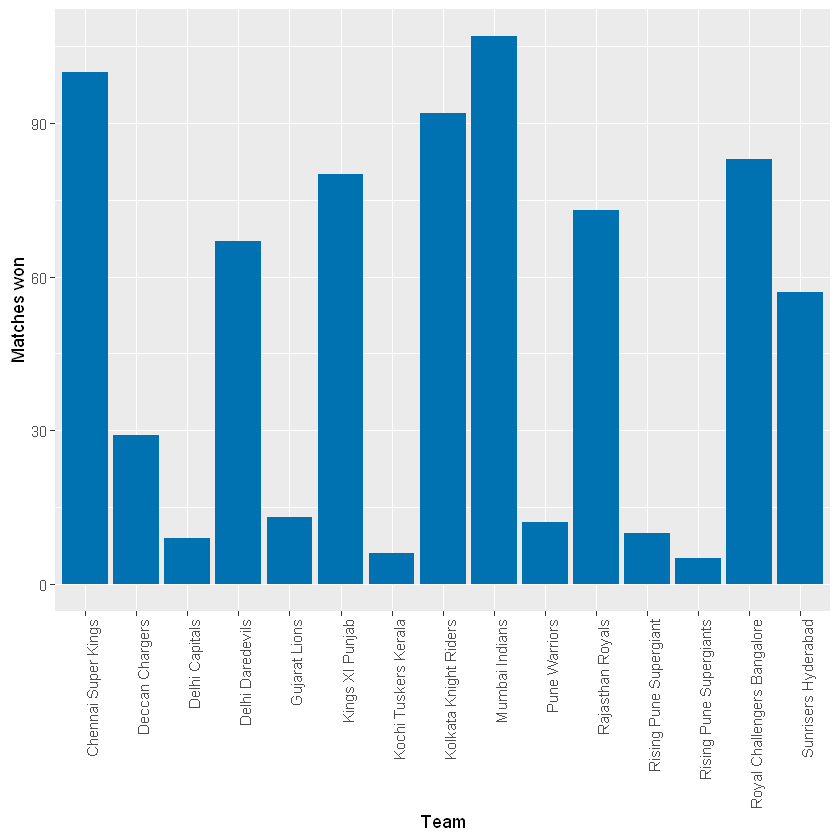

In [8]:
########### NUMBER OF MATCHES WON BY EACH TEAMS ###########################

ggplot(matches,aes(winner)) +geom_bar(fill="#0072B2") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
    ylab("Matches won")

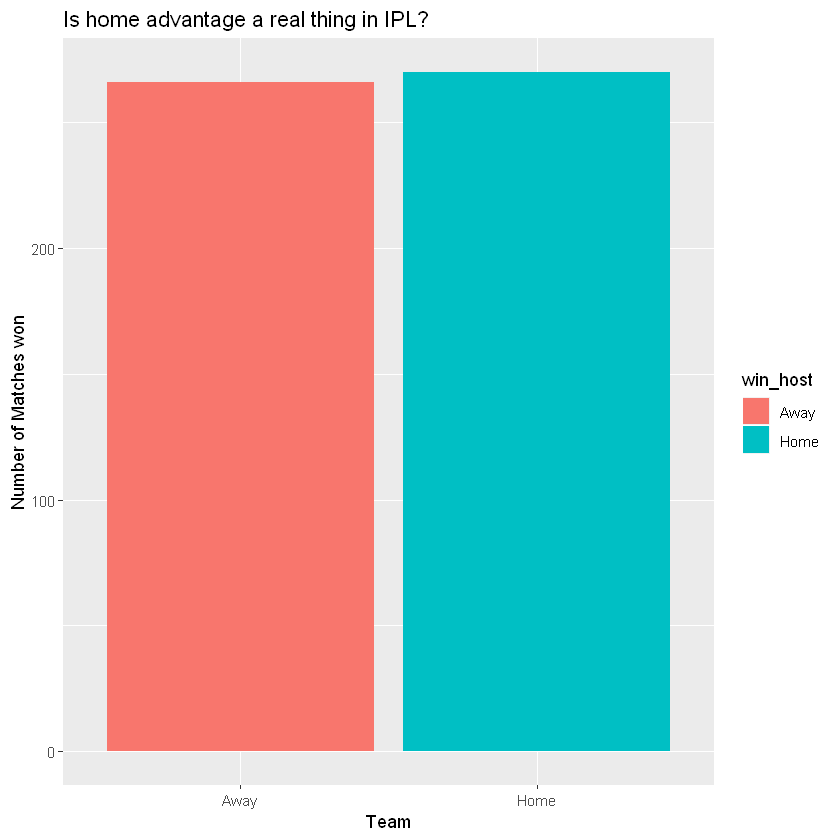

In [9]:
########### IS HOME ADVANGE IS A REAL THING IN IPL HISTORY #############################

Data<-matches[matches$season!="2009",]
Data$date<- as.Date(Data$date)
Data1<-Data[Data$date < as.Date("2014-04-16") | Data$date > as.Date("2014-04-30"),]
Data1$home_team[Data1$city=="Bangalore"]<- "Royal Challengers Bangalore"
Data1$home_team[Data1$city=="Chennai"]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Delhi"]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Chandigarh"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Jaipur"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Mumbai"]<- "Mumbai Indians"
Data1$home_team[Data1$city=="Kolkata"]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Kochi"]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season <=2012]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season >2012]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ahmedabad"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Dharamsala"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Visakhapatnam" & Data1$season== 2015]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ranchi" & Data1$season== 2013]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Ranchi" & Data1$season > 2013]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Rajkot" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Kanpur" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Raipur" ]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Nagpur" ]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Indore" ]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Pune" & Data1$season!= 2016]<- "Pune Warriors"
Data1$home_team[Data1$city=="Pune" & Data1$season== 2016]<- "Rising Pune Supergiants"
Data1<-Data1[ which(!is.na(Data1$home_team)),]
Data1$win_host <- ifelse(as.character(Data1$winner)==as.character(Data1$home_team),"Home","Away")

ggplot(Data1[which(!is.na(Data1$win_host)),],aes(win_host,fill= win_host))+geom_bar()+
    ggtitle("Is home advantage a real thing in IPL?")+
    xlab("Team")+
    ylab("Number of Matches won")+labs(aesthetic="Winner")

Joining, by = "Var1"
Warning message:
"Column `Var1` joining factors with different levels, coercing to character vector"

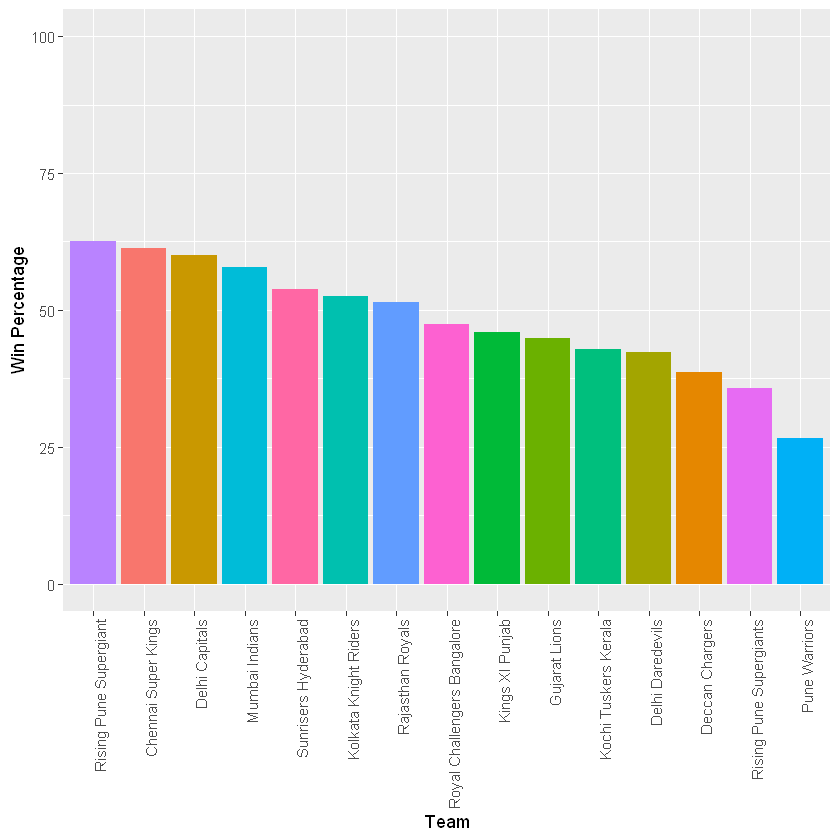

In [10]:
################# WINNING PERCENTAGE OF EACH TEAM ###############################

matches_won<-as.data.frame(table(matches$winner))
colnames(matches_won)[2]<-"Won"
matches_played<-as.data.frame(table(matches$team2) + table(matches$team1))
colnames(matches_played)[2]<-"Played"

ggplot(left_join(matches_played,matches_won ),aes(reorder(Var1,-Won/Played),Won*100/Played,fill = Var1)) +geom_bar(stat = "identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
    ylab("Win Percentage") +  guides(fill=FALSE)+coord_cartesian(ylim = c(0, 100))


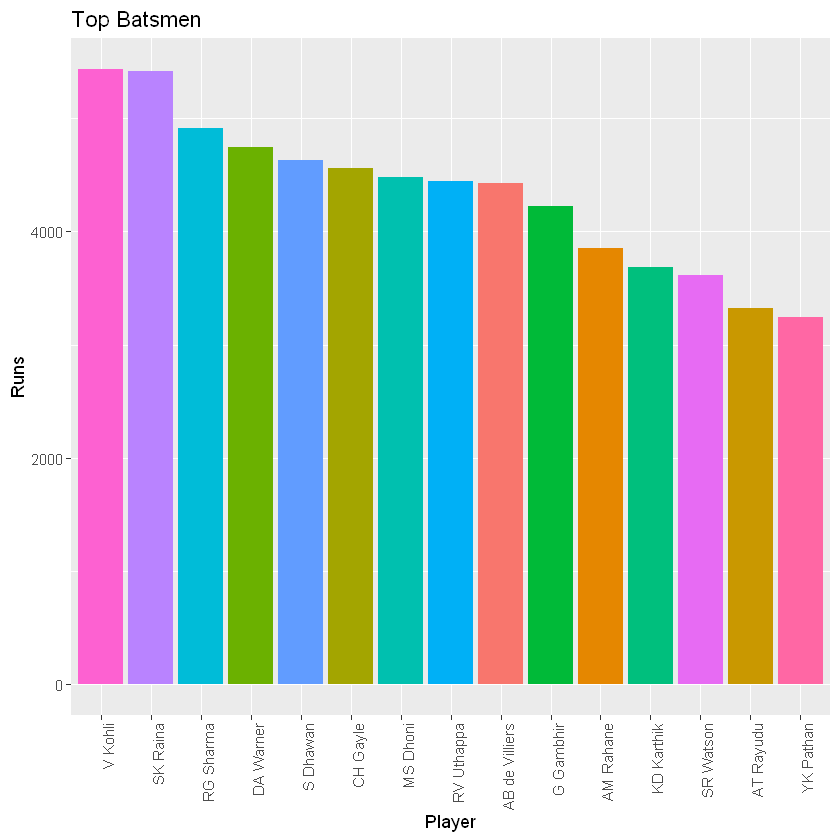

In [11]:
#####################  TOP BATSMAN IN IPL ################################################################

df<- deliveries %>% group_by(batsman)%>% summarise(runs=sum(batsman_runs)) %>% arrange(desc(runs)) %>%
    filter(runs > 3000) 
df %>% ggplot(aes(reorder(batsman,-runs),runs,fill=batsman)) +geom_bar(stat = "identity") +xlab("Batsman")+ 
    ylab("Runs")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    xlab("Player")+ ggtitle("Top Batsmen")+ guides(fill=F)

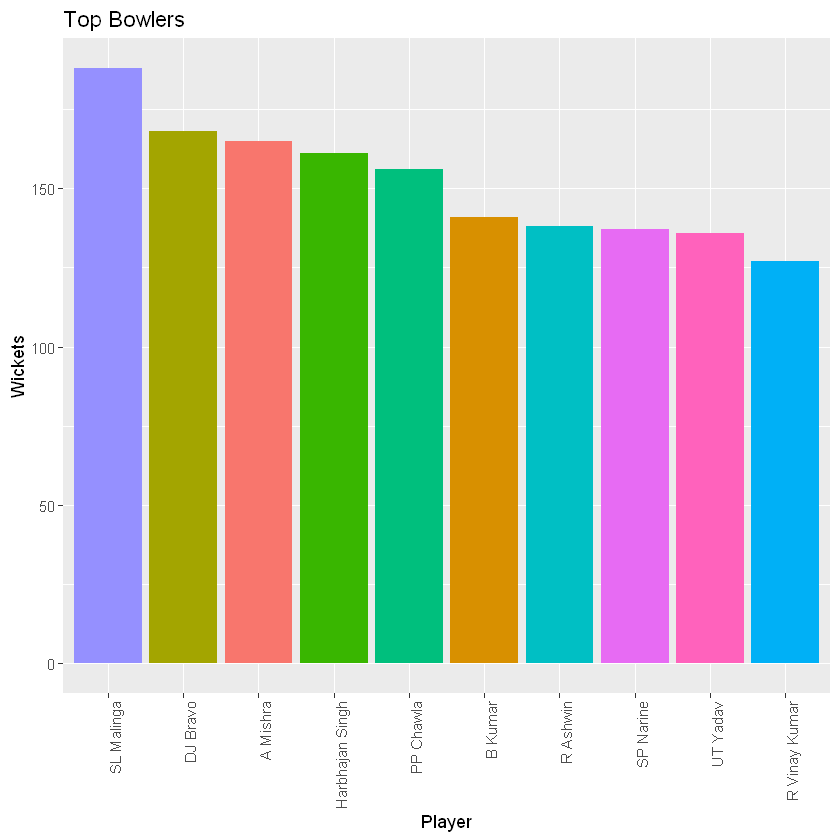

In [12]:
#########################   TOP BOWLER IN IPL TILL 2016  #################################
df<-deliveries %>% group_by(bowler) %>% filter(player_dismissed!="") %>% 
    summarise(wickets= length(player_dismissed)) %>% top_n(n=10,wt=wickets) 
df %>% ggplot(aes(reorder(bowler,-wickets),wickets,fill=bowler))+geom_bar(stat = "identity") +
    ylab("Wickets")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ ggtitle("Top Bowlers")+ 
    guides(fill=F)

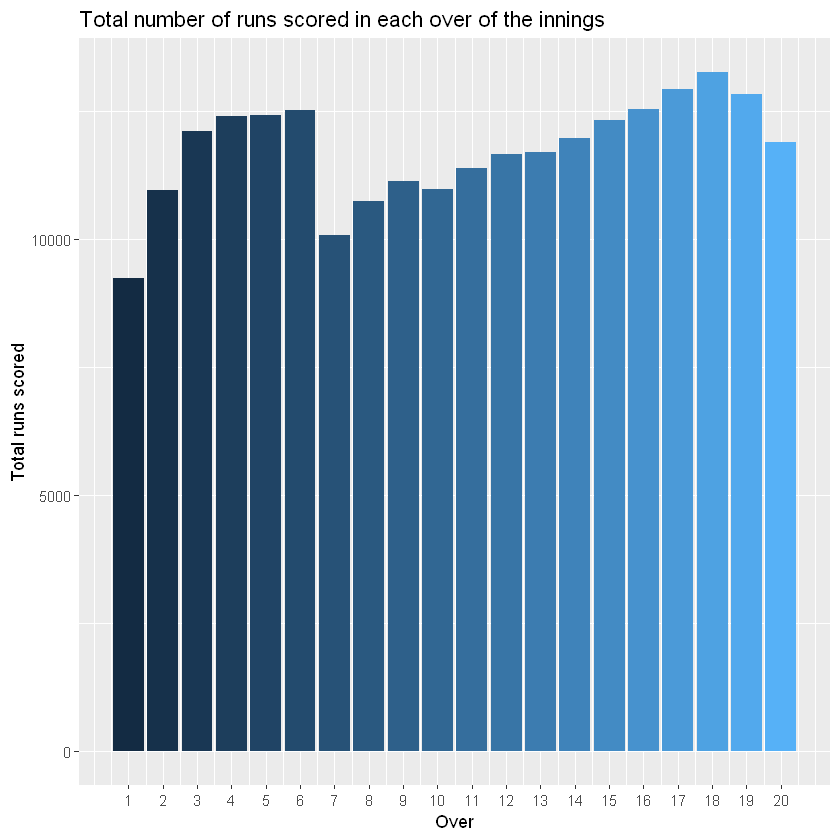

In [13]:
##########################   TOTAL RUNS SCORED IN EACH OVER OF INNINGS ####################3

df <- deliveries %>% group_by(over) %>% filter(is_super_over==0) %>% summarise(Runs= sum(total_runs))
##print(df)
df %>% ggplot(aes(over,Runs,fill=over))+geom_bar(stat = "identity")+scale_x_continuous(breaks = 1:20)+ 
    guides(fill=F) +xlab("Over") + ylab("Total runs scored") +
    ggtitle("Total number of runs scored in each over of the innings")

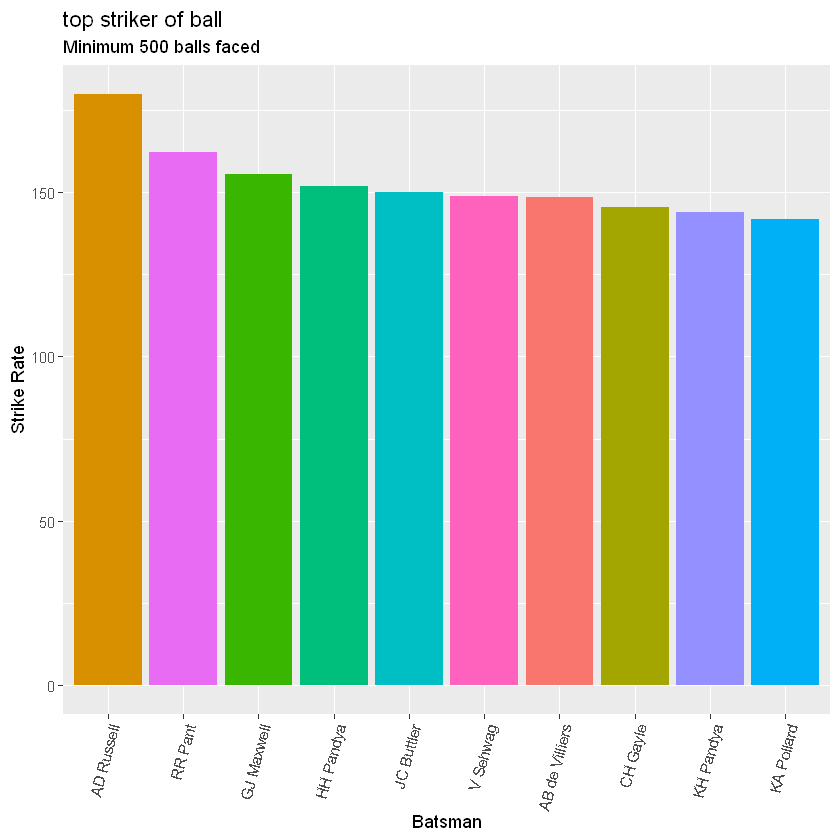

In [14]:
###################  TOP STRIKER OF THE BALL  ###############################

deliveries %>% group_by(batsman) %>% filter(length(total_runs)>500) %>% 
    summarise(strike_rate= mean(batsman_runs)*100) %>% top_n(n=10,wt=strike_rate) %>%
    ggplot(aes(reorder(batsman,-strike_rate),strike_rate,fill=batsman))+ geom_bar(stat="identity")+ 
    xlab("Batsman") + ylab("Strike Rate") +
    ggtitle("top striker of ball",subtitle = "Minimum 500 balls faced")+
    theme(axis.text.x = element_text(angle = 75, hjust = 1)) + guides(fill=F)

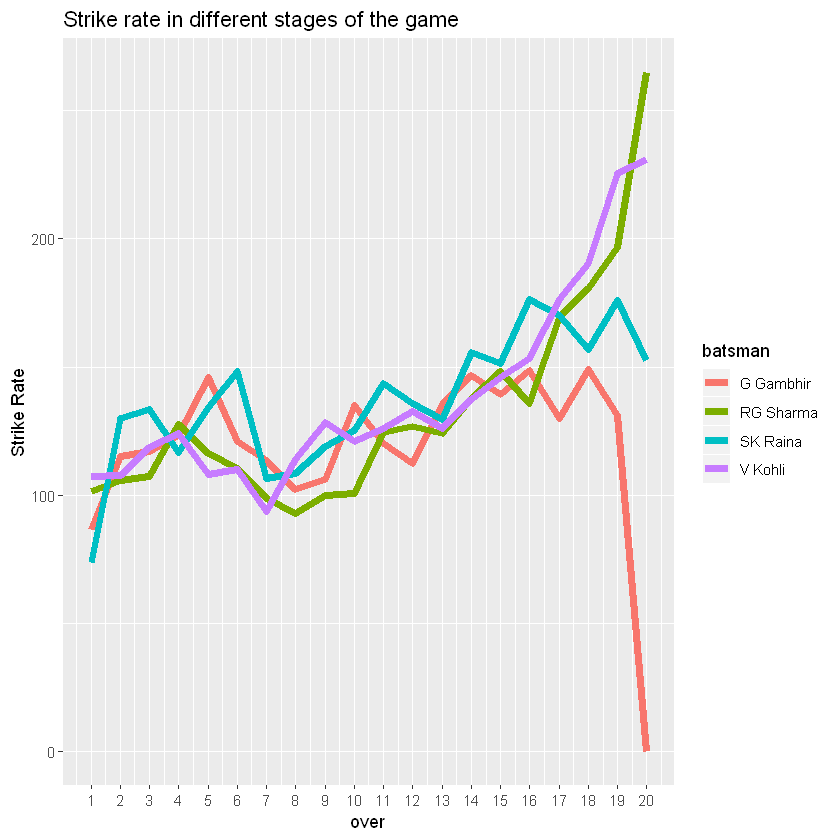

In [25]:
######################### STRIKE RATE OF TOP GETTERS AT DIFFERENT STAGES OF THE GAME  #################3

deliveries %>% 
    filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
    group_by(batsman,over) %>% summarise(strike= mean(batsman_runs)*100) %>%  
    ggplot(aes(over,strike, col=batsman)) + geom_line(size=2) + ylab("Strike Rate") + 
    ggtitle("Strike rate in different stages of the game ") + scale_x_continuous(breaks = 1:20)

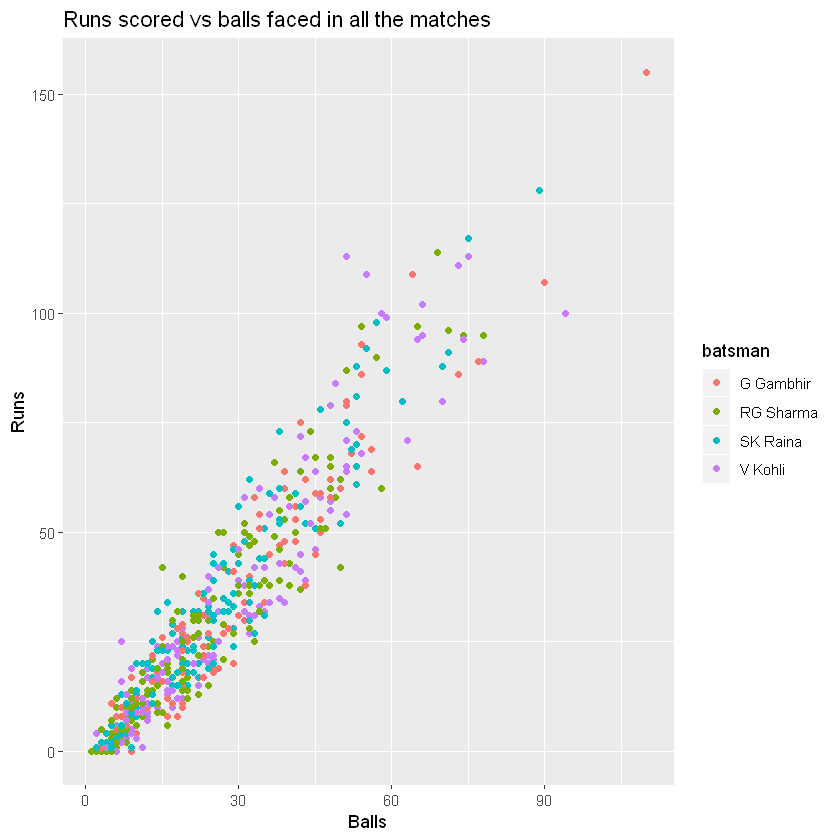

In [32]:
################################ RUN VS BALL FACES OF TOP SCORERES   #############################

deliveries %>%filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
    group_by(match_id) %>%
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    filter(player_dismissed=="V Kohli"|player_dismissed=="SK Raina" |player_dismissed=="RG Sharma"|player_dismissed=="G Gambhir") %>% 
    ggplot(aes(cum_ball,cum_run,col=batsman)) +geom_point() + xlab("Balls") +
    ylab("Runs")+ ggtitle("Runs scored vs balls faced in all the matches")

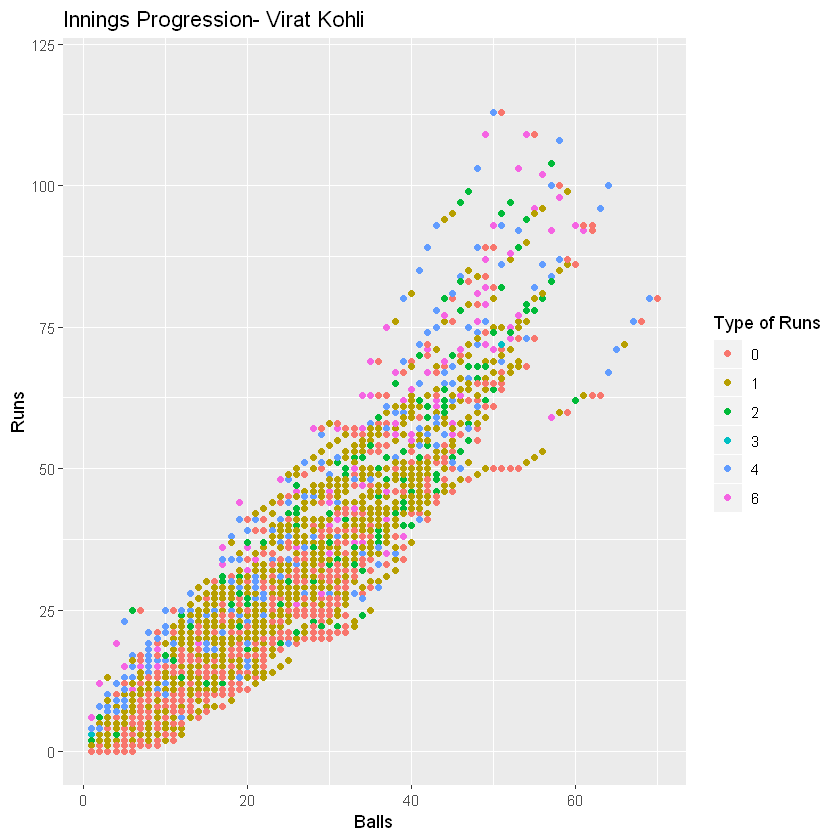

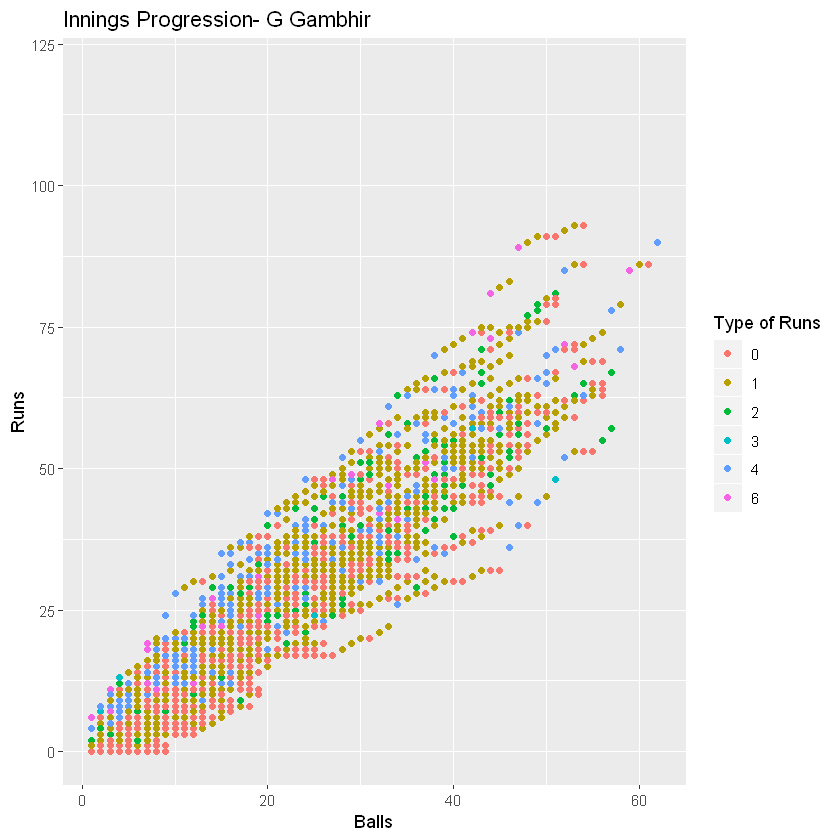

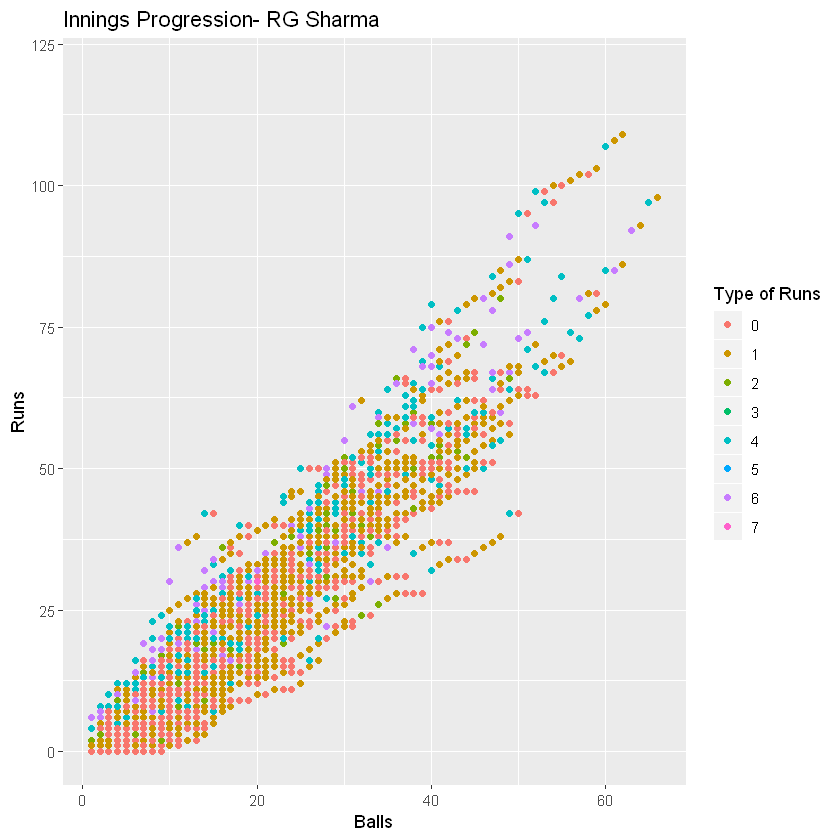

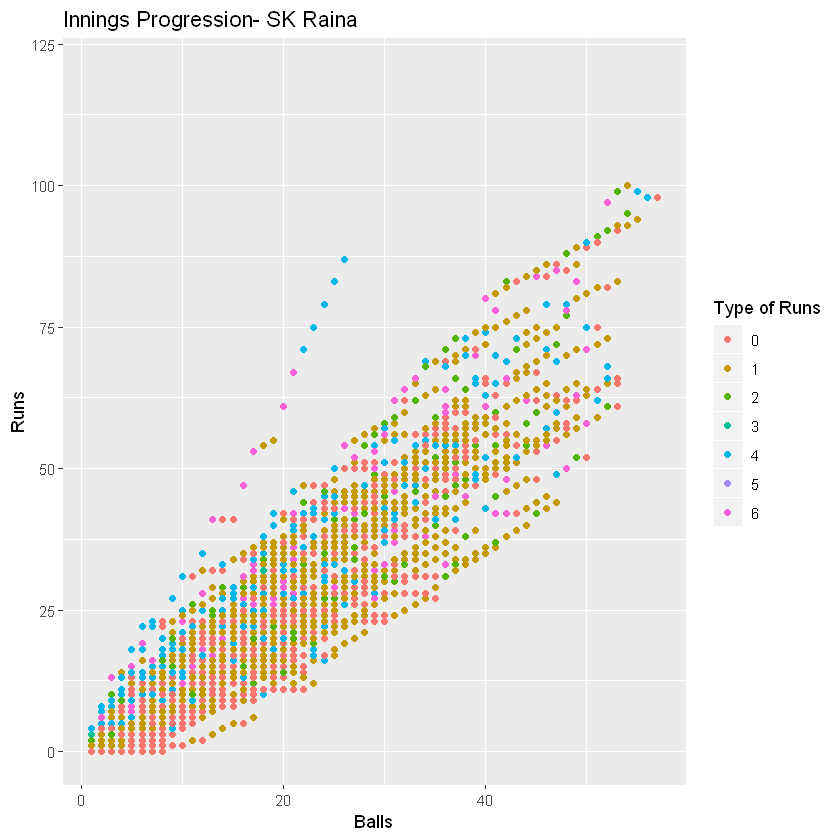

In [33]:
###################### INNING PROGRESSION BY PLAYER  ###############################################


deliveries %>% filter(batsman=="V Kohli") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- Virat Kohli") +  coord_cartesian(ylim = c(0, 120)) 

deliveries %>% filter(batsman=="G Gambhir") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- G Gambhir")+  coord_cartesian(ylim = c(0, 120)) 
deliveries %>% filter(batsman=="RG Sharma") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- RG Sharma")+  coord_cartesian(ylim = c(0, 120)) 
deliveries %>% filter( batsman=="SK Raina" ) %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- SK Raina")+  coord_cartesian(ylim = c(0, 120))

